In [6]:
import contextily as cx
from project.models import Project
import geopandas
from shapely.geometry import MultiPolygon, Polygon
import matplotlib.pyplot as plt

In [ ]:
filepath = "../../public_data/local_data/obs_artif_conso_com_2009_2021/obs_artif_conso_com_2009_2021.shp"
gdf = geopandas.read_file(filepath)
gdf.crs

In [4]:
diagnostic = Project.objects.all().first()
geom = diagnostic.combined_emprise.transform("2154", clone=True)

polygons = MultiPolygon([Polygon(coord) for coord in geom.coords])
selection = gdf.intersects(polygons)
grand_coeur = gdf.loc[selection]
grand_coeur

,idcom,idcomtxt,idreg,idregtxt,iddep,iddeptxt,epci21,epci21txt,scot,aav2020,...,men18,men1318,emp13,emp18,emp1318,mepart1318,menhab1318,artpop1318,surfcom202,geometry
11838,32002,Ansan,76,Occitanie,32,Gers,200042372,CC des Coteaux Arrats Gimone,SCoT de Gascogne,145,...,44,-3,0,5,5,0.00,0.00,0.00,7751804.0,"POLYGON ((520573.000 6288766.000, 520574.000 6..."
11839,32003,Antras,76,Occitanie,32,Gers,200066926,CA Grand Auch Cœur de Gascogne,SCoT de Gascogne,145,...,20,5,9,5,-4,7.09,35.46,-352.50,6730961.0,"POLYGON ((491979.000 6295924.000, 491965.000 6..."
11846,32012,Aubiet,76,Occitanie,32,Gers,200042372,CC des Coteaux Arrats Gimone,SCoT de Gascogne,145,...,494,-8,300,232,-68,-2.49,-0.27,-9246.45,39211048.0,"POLYGON ((516366.000 6288309.000, 516367.000 6..."
11847,32013,Auch,76,Occitanie,32,Gers,200066926,CA Grand Auch Cœur de Gascogne,SCoT de Gascogne,145,...,11675,288,16353,16285,-68,6.00,11.82,1539.80,73407705.0,"POLYGON ((497297.000 6285454.000, 497313.000 6..."
11848,32014,Augnax,76,Occitanie,32,Gers,200066926,CA Grand Auch Cœur de Gascogne,SCoT de Gascogne,145,...,46,4,0,5,5,8.77,3.90,932.73,3991345.0,"POLYGON ((520072.000 6293066.000, 519973.000 6..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12235,32406,Saint-Sauvy,76,Occitanie,32,Gers,200042372,CC des Coteaux Arrats Gimone,SCoT de Gascogne,N/A,...,152,-1,59,40,-19,-1.75,-0.09,-57242.50,17654424.0,"POLYGON ((520621.000 6291771.000, 520666.000 6..."
12241,32412,Saramon,76,Occitanie,32,Gers,200042372,CC des Coteaux Arrats Gimone,SCoT de Gascogne,145,...,400,12,314,342,28,3.49,1.23,4402.00,13084070.0,"POLYGON ((517118.000 6271564.000, 517118.000 6..."
12282,32453,Tourrenquets,76,Occitanie,32,Gers,200066926,CA Grand Auch Cœur de Gascogne,SCoT de Gascogne,145,...,50,4,12,10,-2,16.12,32.23,-155.13,7228958.0,"POLYGON ((513165.000 6297977.000, 513251.000 6..."
12291,32462,Vic-Fezensac,76,Occitanie,32,Gers,243200607,CC Artagnan de Fezensac,SCoT de Gascogne,616,...,1761,16,1522,1515,-7,0.92,1.84,-1814.59,54843756.0,"POLYGON ((474953.000 6299790.000, 474978.000 6..."


In [15]:
ign_url = (
    "https://wxs.ign.fr/ortho/geoportail/wmts?"
    "&REQUEST=GetTile&SERVICE=WMTS&VERSION=1.0.0&TILEMATRIXSET=PM"
    "&LAYER=ORTHOIMAGERY.ORTHOPHOTOS&STYLE=normal&FORMAT=image/jpeg"
    "&TILECOL={x}&TILEROW={y}&TILEMATRIX={z}"
)

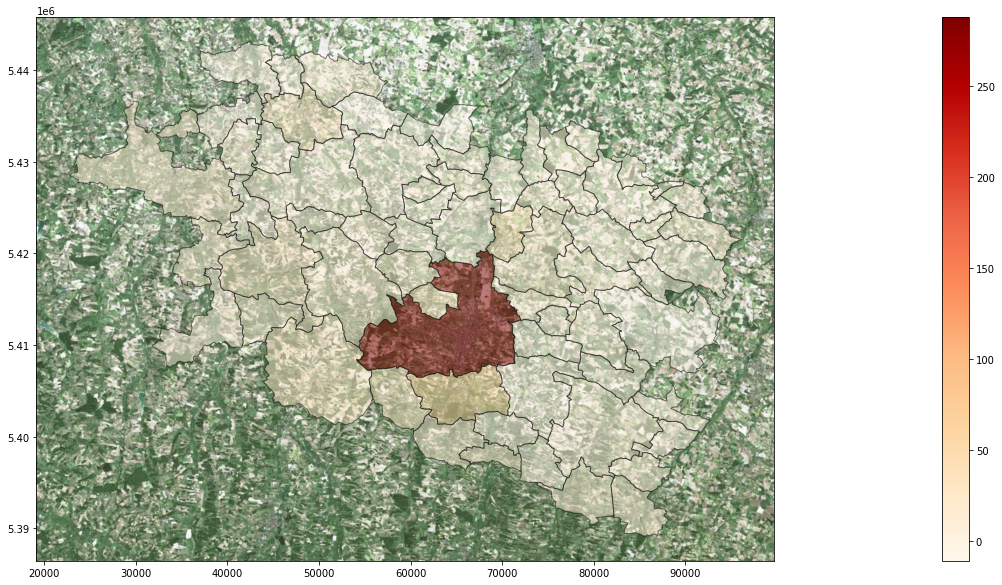

In [23]:
grand_coeur = grand_coeur.to_crs(epsg=3857)
ax = grand_coeur.plot("men1318", legend=True, cmap='OrRd', figsize=(60, 10), alpha=0.5, edgecolor='k')
cx.add_basemap(ax, source=ign_url)